In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## sample 1 milion data points

In [186]:
X1 = np.random.normal(3, 4, 1000000)
X2 = np.random.normal(-1, 4, 1000000)
X0 = np.ones_like(X1)
Y= 3*X0+X1+2*X2 +np.random.normal(0,2**0.5,1000000)

#preprocessing
# X1-=np.mean(X1)
# X1/=np.var(X1)

# X2-=np.mean(X2)
# X2/=np.var(X2)

## SGD

In [211]:
batch_size=10000
alpha=0.000001
batchs=[np.array((X0[i:i+batch_size],X1[i:i+batch_size],X2[i:i+batch_size],Y[i:i+batch_size])).T for i in range(0,1000000,batch_size)]

In [212]:
batchs[0]

array([[  1.        ,   2.67371999,  -1.11624371,   4.19954524],
       [  1.        ,   6.83828738,   2.73543611,  15.3619726 ],
       [  1.        ,   7.78344554,  -1.18872889,   8.76638747],
       ...,
       [  1.        ,   6.69530853, -10.3261628 , -12.16961339],
       [  1.        ,   6.63931417,  -1.33574945,   3.90529831],
       [  1.        ,   7.70533812,   8.44924669,  29.00919032]])

In [213]:
theta=np.zeros((1,3))
def hypothesis(X,theta):
    return np.dot(X,theta.T)
def Jtheta(y,X,theta):
    yhat=hypothesis(X,theta).reshape(-1,1)
    return (0.5*np.dot((y-yhat).T,(y-yhat))/yhat.shape[0]).flatten()


In [214]:
store_theta=[]
for epoch in range(10):
    for i,batch in enumerate(batchs):
        temp=alpha*np.dot((batch[:,-1].reshape(-1,1)-hypothesis(batch[:,:-1],theta)).T,batch[:,:-1])
        theta=theta  +(temp)# if temp.all()<10 else np.array([1.,1.,1.]).reshape(1,3)) 
        # print(theta) if i%1000==0 else 0
        store_theta.append(theta.tolist())
    print(theta)
store_theta= np.array(store_theta).squeeze(1)

[[1.4154119  1.18536094 1.93698061]]
[[2.13790083 1.10018121 1.96589049]]
[[2.53079048 1.05386045 1.98161166]]
[[2.74444396 1.02867121 1.99016084]]
[[2.86062878 1.01497329 1.99480989]]
[[2.92381011 1.00752436 1.99733804]]
[[2.95816813 1.00347363 1.99871285]]
[[2.97685203 1.00127084 1.99946047]]
[[2.98701234 1.00007296 1.99986702]]
[[2.99253752 0.99942156 2.00008811]]


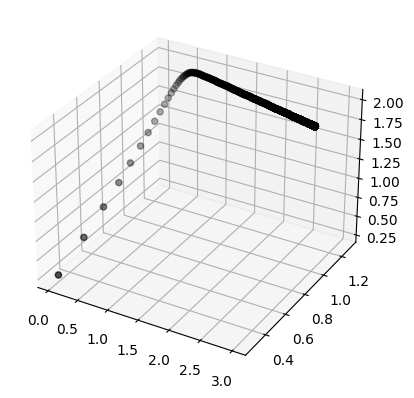

In [216]:
ax=plt.axes(projection='3d')
ax.scatter(store_theta[:,0].flatten(),store_theta[:,1].flatten(),store_theta[:,2].flatten(),color='black')

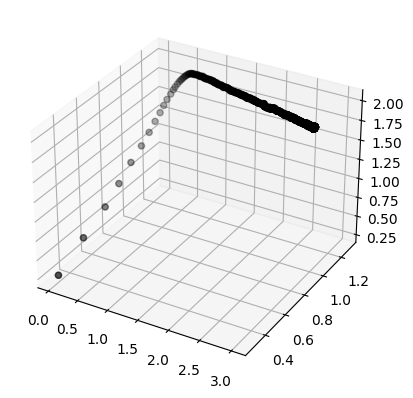

In [210]:
# store_theta= np.array(store_theta).squeeze(1)
ax=plt.axes(projection='3d')
ax.scatter(store_theta[:,0].flatten(),store_theta[:,1].flatten(),store_theta[:,2].flatten(),color='black')

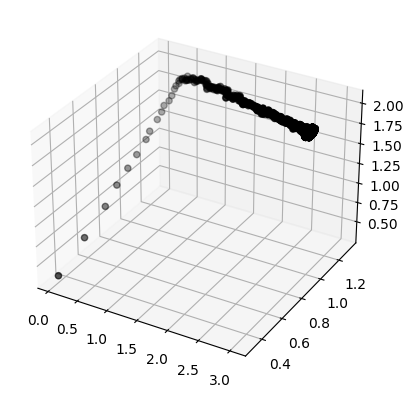

In [197]:
# store_theta= np.array(store_theta).squeeze(1)
ax=plt.axes(projection='3d')
ax.scatter(store_theta[:,0].flatten(),store_theta[:,1].flatten(),store_theta[:,2].flatten(),color='black')

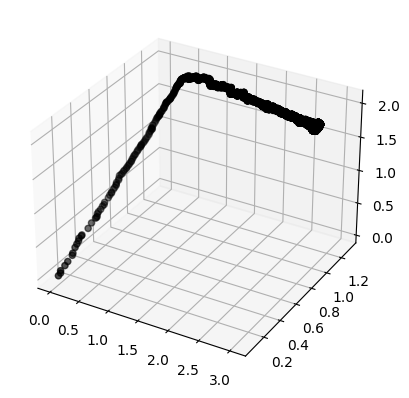

In [191]:
# store_theta= np.array(store_theta).squeeze(1)
ax=plt.axes(projection='3d')
ax.scatter(store_theta[:,0].flatten(),store_theta[:,1].flatten(),store_theta[:,2].flatten(),color='black')

In [192]:
store_theta[:,0].flatten(),store_theta[:,1].flatten(),store_theta[:,2].flatten()

(array([0.00922933, 0.012867  , 0.01127085, ..., 3.00969401, 3.00938704,
        3.00934019]),
 array([0.07114139, 0.09233519, 0.0946134 , ..., 1.00167637, 1.00046932,
        1.00230976]),
 array([0.02470339, 0.04193213, 0.07480122, ..., 1.99971634, 2.0017344 ,
        2.00191734]))